![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='top1'></a>
# <center>Desafio 1: Análisis exploratorio de un dataset de precios de propiedades

### Grupo 6:
- Fairhurst, Guillermo
- Castellari, Diego
- Ripoll, Rodrigo



## Indice
  
<a href='#section1'>**Step 1:**</a>   Importar el dataframe de Properatti    
<a href='#section2'>**Step 2:**</a>   Health Check   
<a href='#section3'>**Step 3:**</a>   Detección de Outliers  
<a href='#section4'>**Step 4:**</a>   Análisis de Correlación


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section1'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 1: Importamos el Dataframe de Properati y realizamos primeras observaciones:</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>


In [1]:
import os
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('properatti.csv')

In [3]:
pd.set_option("display.max_columns", None)  # para poder ver todas las columnas
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
print('Columnas:                     Count:          dtype:')
print('-'*55)

df.info()

Columnas:                     Count:          dtype:
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 2: Helth Check</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

Realizamos un primer análisis exploratorio del dataset, buscamos ver que informacion es relevante y detectamos información faltante que pueda llegar a ser completada utilizando otros campos

## 2.1 Limpieza del Dataset
**Primeras observaciones:**  
<a href='#section2.1.1'>**2.1.1**</a> Para el presente ejercicio, las siguientes columnas pueden ser eliminadas:  
  - `Unnamed: 0`: repite la informacion del indice autogenerado por pandas   
  - `country`: se puede eliminar porque todas las propiedades son de Argentina.  
  - `geonames_id`: no encontramos relevancia sobre la columna ya que la informacion geografica faltante puede obtenerse de la columna `place_name`  
  - `lat-lon`: consolida a las columnas `lat` y `lon`. Consideramos de mayor utilidad dejar la información de latitud y longitud por separado por lo que se puede eliminar y asi evitar redundancia. Los datos faltantes de `lat` y `lon` pueden obtenerse de la columna `place_name` como se mencionó anteriormente.  
  - `properati_url`: carece de utilidad para el presente ejercicio  
  - `image_thumbnail` carece de utilidad para el presente ejercicio  
  
<a href='#section2.1.2'>**2.1.2**</a> las columnas `operation`, `property_type` y `currency` puede cambiarse el tipo de dato a "categorical" para optimizar el uso de memoria.  
<a href='#section2.1.3'>**2.1.3**</a> la columna `rooms` puede ser completada aplicando regex sobre las columnas `description` y `title`.  
<a href='#section2.1.4'>**2.1.4**</a> `place_with_parent_names` agrupa a las columnas `country`, `state_name` y `place_name` de esta primera se pueden completar los 23 campos faltantes de `place_name` que casualmente son "Tigre".   
<a href='#section2.1.5'>**2.1.5**</a> Completamos los campos de latitud y longitud faltantes.  
<a href='#section2.1.6'>**2.1.6**</a> trabajamos con las columnas de precios.  
<a href='#section2.1.7'>**2.1.7**</a> Observamos que todas las columnas con datos quantitativos estan en formato float, por lo que no requieren acciones adicionales. 


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h3>2.1 Limpieza del Dataset</h3></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


In [5]:
# guardamos 1 copia del original
#df_orig = df.copy()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.1'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.1 Eliminamos las columnas innecesarias</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


In [6]:
# la columna 'Unnamed: 0'es un indice es innecesaria, la eliminamos
df = df.drop(['Unnamed: 0','country_name','geonames_id','lat-lon','properati_url','image_thumbnail'], axis=1)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.2'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.2 Cambiar el tipo de datos a categorico cuando corresposonde</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


La columna `operations` posee un unico valor: sell. Como la hoja de consigna indica que potencialmente puede tomar 2 posibles 
valores (sell/rent) no eliminamos la columna, pero la hacemos del tipo category.  
Hacemos lo mismo con las columnas `property_type` y `currency`.

In [7]:
df['operation'] = df['operation'].astype('category')
df['property_type'] = df['property_type'].astype('category')
df['currency'] = df['currency'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 20 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
state_name                    121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
floor                         7899 non-null float64
rooms                         47

__**nota:**__ se redujo el espacio en memorio del dataset en 8MB (33%) lo cual hara mas eficiente todas las operaciones a continuación 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.3'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.3 inferir valores faltantes del feature 'room'</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>
 


A continuación vamos a completar la informacion faltante de la columna `rooms` con la informacion que pueda obtenerse de las columnas `description` y `title`. Para ello vamos a utilizar la libreria ***re***  

Definmos una funcion `cant_amb()` que utilizaremos para obtener la cantidad de ambientes mencionadas en la columnas de `description` y `title`.

In [8]:
def cant_amb(text):
    ambRegex = re.compile(r'''
        (mono)     #intento matchear monoambiente
        \s?
        amb.?\w*
        |          # o
        (\d)       # cantidad de ambientes
        \s?        # espacio - puede estar o no -
        amb.?\w*   # segido por amb, amb. o ambiente
        ''', re.VERBOSE | re.IGNORECASE)
    try:
        mo = ambRegex.search(text)
        #print(mo.group(1))
        if mo.group(1) != None:
            return 1
        if mo.group(2) != None:
            return int(mo.group(2))
    except:
        return np.nan

In [9]:
# extraemos la cantidad de ambientes mencionados en las columnas descriptivas.
amb = df[['description','title']].applymap(lambda x: cant_amb(x))
amb.head()

,description,title
0,2.0,2.0
1,NaN,NaN
2,2.0,2.0
3,3.0,3.0
4,NaN,2.0


In [10]:
amb = pd.concat([amb, df['rooms']], axis=1)

#consolidamos la informacion extraida de las columnas descriptivas en una nueva variable amb_unif
amb['unif'] = amb.apply(lambda x: math.ceil(x.sum()/x.count()) if x.count() != 0 else np.nan,axis=1)

In [11]:
#consolidamos la informacion extraida de las columnas descriptivas en una nueva variable amb_unif
amb_unif = amb.apply(lambda x: x.sum()/x.count() if x.count() != 0 else np.nan,axis=1)

In [12]:
amb['unif'].count()

73291

Vemos que previamente a este ejercicio teníamos 52,004 campos con valores para la columna `room` y luego del ejercicio tenemos 73,291 (logramos recuperar un 40% de datos adicionales a los dators originales sobre la columna room. 

In [13]:
df['room']= amb['unif']

Dado que ya utilizamos las columnas `description` y `title` para completar la cantidad de ambientes en la columna `rooms`, estas pueden ser eliminadas.

In [14]:
df = df.drop(['description','title'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 19 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
state_name                    121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
floor                         7899 non-null float64
rooms                         47

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.4'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.4 Trabajamos sobre los features `place_with_parent_names` , `country`, `state_name` y `place_name`</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>
 

Observamos que `place_with_parent_names` agrupa a las columnas `country`, `state_name` y `place_name`. También vemos que la descripcion dentro de `place_with_parent_names` tiene hasta 4 niveles de detalle.  
Manipulamos la columna para quedarnos unicamente con los primeros 3 niveles.
Finalmente buscamos uniformizar los nombres de la provincia de Buenos Aires.

In [16]:
def geo_limit(text):
    address_list = text.split('|')
    pais = address_list[1]
    provincia = address_list[2]
    barrio = address_list[3]
    
    if len(barrio)==0: barrio = provincia 
    if 'bs.as' in provincia.lower(): provincia = 'Buenos Aires'
    if 'buenos aires' in provincia.lower(): provincia = 'Buenos Aires'
        

    return barrio.title()+", "+provincia.title()+", "+pais.title()    

In [17]:
#probamos la función
geo_limit('|Argentina|buenos aires|palermo|pepe|')

'Palermo, Buenos Aires, Argentina'

In [18]:
df['place_with_parent_names'] = df['place_with_parent_names'].apply(geo_limit)

In [19]:
df

,operation,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,room
0,sell,PH,Mataderos,"Mataderos, Capital Federal, Argentina",Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,2.0
1,sell,apartment,La Plata,"La Plata, Buenos Aires, Argentina",Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,"Mataderos, Capital Federal, Argentina",Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2.0
3,sell,PH,Liniers,"Liniers, Capital Federal, Argentina",Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,sell,apartment,Centro,"Mar Del Plata, Buenos Aires, Argentina",Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,2.0
5,sell,house,Gualeguaychú,"Gualeguaychú, Entre Ríos, Argentina",Entre Ríos,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sell,PH,Munro,"Vicente López, Buenos Aires, Argentina",Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,NaN
7,sell,apartment,Belgrano,"Belgrano, Capital Federal, Argentina",Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,1.0
8,sell,apartment,Belgrano,"Belgrano, Capital Federal, Argentina",Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,NaN
9,sell,house,Rosario,"Rosario, Santa Fe, Argentina",Santa Fe,-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuacion creamos una lista con todos los nombres de los barrios, que será utilizada en un futuro para:  
1) a fin de poder capturar sus correspondientes ubicaciones geograficas (lat y lon) y completar en las ocurrencias del dataset que faltasen.  
2) calcular los precios promedio del m2 por barrio.

In [20]:
lista_de_barrios = list(df['place_with_parent_names'].unique())
len(lista_de_barrios)

575

En este punto consideramos que no es necesario conservar la información de las columnas `state_name` y `place_name` ya que de ser necesarias a futuro se pueden recuperar de la columna `place_with_parent_names`

In [21]:
df = df.drop(['state_name','place_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 17 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_with_parent_names       121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
floor                         7899 non-null float64
rooms                         47390 non-null float64
expenses                      14262 non-null float64
room                          73

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.5'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.5 Completamos los datos de Lat y Lon faltantes</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


A continuación vamos a completar la informacion de las columnas `lat` y `lon` con la informacion de `place_name`.  
Para ello vamos a utilizar la librerio ***geopy***  

El primer paso es crear un nuevo dataframe que tenga como indice los +500 barrios, y crear una funcion que para obtener los datos de Lat y Lon a partir de la api de geopy.

In [22]:
df_barrios = pd.DataFrame(df['place_with_parent_names'].unique(), columns=['Barrios'])
df_barrios.set_index('Barrios', inplace=True)
df_barrios.head(3)

""
Barrios
"Mataderos, Capital Federal, Argentina"
"La Plata, Buenos Aires, Argentina"
"Liniers, Capital Federal, Argentina"


2) a continuación instalamos la librería ***geopy*** y generamos 3 columnas nuevas:  
- `geopy`  
- `geopy_lat`  
- `geopy_lon`

In [23]:
#!pip install geopy

In [24]:
from geopy.geocoders import Nominatim  
nom = Nominatim(user_agent = "my-application")

# definimos una funcion que incorporte el try: / except:
def my_geocode(location):
    print('.',end='')
    try:
        return nom.geocode(location)
    except:
        return None

# probamos que la libreria este funcionando correctamente
#display(nom.geocode(',Argentina,Capital Federal,Mataderos,'))
#display(my_geocode("Pinamar, Buenos Aires, Argentina"))

In [25]:
#df_barrios['geopy'] = [my_geocode(item) for item in df_barrios.index]

In [26]:
display(df_barrios.head(3))
display(df_barrios[df_barrios['geopy'].isnull()])
display(df_barrios.info())

""
Barrios
"Mataderos, Capital Federal, Argentina"
"La Plata, Buenos Aires, Argentina"
"Liniers, Capital Federal, Argentina"


KeyError: 'geopy'

In [27]:
df_barrios['geopy_lat'] = df_barrios['geopy'].apply(lambda x: x.latitude if x != None else None)
df_barrios['geopy_lon'] = df_barrios['geopy'].apply(lambda x: x.longitude if x != None else None)

KeyError: 'geopy'

In [28]:
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, Mataderos, Capital Federal, Argentina to Malabrigo, Santa Fe, Argentina
Empty DataFrame

Dado que generar este dataframe `df_barrios` conlleva un tiempo considerable ~30min, guardamos el mismo en formato ***CSV*** para poder cargarlo en futuras oportunidades.

In [29]:
#df_barrios.iloc[:,1:].to_csv('barrios_geolocation.csv', index=True,encoding='utf-8')

Detectamos valores faltantes y:  
- buscamos completarlos una vez mas con la api de geopy (x si hubo timeouts)
- buscamos completarlos con nuestro dataframe de properatti
- carga manual via diccionario.

In [30]:
#df_barrios[df_barrios['geopy'].isnull()] 

In [31]:

#array_timeout = [my_geocode(item) for item in df_barrios[df_barrios['geopy'].isnull()].index]

In [32]:
#df_barrios.loc[df_barrios['geopy'].isnull(),'geopy']=array_timeout

In [33]:
df_barrios['geopy_lat'] = df_barrios['geopy'].apply(lambda x: x.latitude if x != None else None)
df_barrios['geopy_lon'] = df_barrios['geopy'].apply(lambda x: x.longitude if x != None else None)
df_barrios.info()

KeyError: 'geopy'

In [34]:
#df_barrios[df_barrios['geopy'].isnull()] 

In [35]:
fill_geo = {'Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina':[-34.9038831,-57.9643295],
            'Bs.As. G.B.A. Zona Oeste, Buenos Aires, Argentina':[-34.65110527,-58.64386131],
            'Bs.As. G.B.A. Zona Norte, Buenos Aires, Argentina':[-34.5329567,-58.5217825],
            'El Sauce, Mendoza, Argentina':[-32.876256,68.752605],
            'Alejandro Roca, Entre Ríos, Argentina':[-33.357321,-63.714913],
            'Buenos Aires Costa Atlántica, Buenos Aires, Argentina':[-36.685605,-56.678331], 
            'J A De La Peña, Buenos Aires, Argentina':[-33.830226,-60.487044],
            'San Jorge, Santa Fe, Argentina':[-31.9035784,-61.8558771],
            'Santa Luisa, Entre Ríos, Argentina':[-31.742084,-60.520337],
            'Colastiné, Santa Fe, Argentina':[-31.620936,-60.607967],
            'Falda Del Carmen, Córdoba, Argentina':[-31.585977,-64.458669],
            'San Javier/Yacanto, Córdoba, Argentina':[-32.050142,-65.049925]}

In [36]:
for key in fill_geo.keys():
    df_barrios.loc[key,'geopy_lat'] = fill_geo[key][0]
    df_barrios.loc[key,'geopy_lon'] = fill_geo[key][1]

In [37]:
df_barrios[df_barrios['geopy'].isnull()]

KeyError: 'geopy'

Ahora si quedo completo el dataframe de barrios con sus unicacion geográfica (lat y lon) que podrá ser utilizado para completar los datos faltantes en el dataframe original.

Volvemos a guardar df_barrios en un CSV.

In [38]:
#df_barrios.iloc[:,1:].to_csv('barrios_geolocation.csv', index=True,encoding='utf-8')

In [39]:
df_barrios = pd.read_csv('barrios_geolocation.csv', encoding='utf-8')
display(df_barrios.head(3))
df_barrios.info()


,Barrios,geopy_lat,geopy_lon
0,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
1,"La Plata, Buenos Aires, Argentina",-34.920680,-57.953764
2,"Liniers, Capital Federal, Argentina",-34.642403,-58.520125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 3 columns):
Barrios      575 non-null object
geopy_lat    575 non-null float64
geopy_lon    575 non-null float64
dtypes: float64(2), object(1)
memory usage: 13.6+ KB


Ahora a partir del dataframe ***df_barrios*** pasamos a completar la información de `lat`y `lon` en el ***df*** general.

In [40]:
df = pd.merge(df,df_barrios, left_on='place_with_parent_names',right_on='Barrios', how='left')
df.head()

,operation,property_type,place_with_parent_names,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,room,Barrios,geopy_lat,geopy_lon
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,2.0,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
1,sell,apartment,"La Plata, Buenos Aires, Argentina",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"La Plata, Buenos Aires, Argentina",-34.920680,-57.953764
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2.0,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
3,sell,PH,"Liniers, Capital Federal, Argentina",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"Liniers, Capital Federal, Argentina",-34.642403,-58.520125
4,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,2.0,"Mar Del Plata, Buenos Aires, Argentina",-37.997722,-57.548270


In [ ]:
mask_missing_geo = (df['lat'].isnull()) | (df['lon'].isnull())
print('cantidad de filas con valores de lat y lon incompletos: ',mask_missing_geo.sum())

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.6'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.6 Trabajamos con las columnas de Precios para detectar inconsistencias y completar valores que puedan ser deducidos</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>

Eliminamos las filas que no posen precio ni suficientes datos para inferirlos (ej. no posen precio x metro cuadrado ni superficie)

In [41]:
mask = df['price'].isnull() & df['currency'].isnull() & df['price_aprox_local_currency'].isnull() & df['price_aprox_usd'].isnull() & df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df['price_usd_per_m2'].isnull() & df['price_per_m2'].isnull()
df.drop(df[mask].index, inplace=True)

print('se eliminaron {} filas\n'.format(mask.sum()))

df.info()

se eliminaron 4733 filas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116487 entries, 0 to 121219
Data columns (total 20 columns):
operation                     116487 non-null category
property_type                 116487 non-null category
place_with_parent_names       116487 non-null object
lat                           66089 non-null float64
lon                           66089 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
floor                         7595 non-null float64
rooms                         45043 non-null float64
expenses                      14212 non-null float64
room  

creamos una serie con multi-indice para calcular el precio promedio del m2 por barrio, que luego utilizaremos para completar datos faltantes de la columna de precio por m2

In [42]:
ds_precio_prom_barrio = df.groupby(['property_type','place_with_parent_names'])['price_usd_per_m2'].mean()
ds_precio_prom_barrio.dropna(inplace=True)
ds_precio_prom_barrio

property_type  place_with_parent_names                              
PH             Abasto, Capital Federal, Argentina                       1570.485350
               Agronomía, Capital Federal, Argentina                    1566.441441
               Aguas Verdes, Buenos Aires, Argentina                     545.454545
               Almagro, Capital Federal, Argentina                      1760.360408
               Almirante Brown, Buenos Aires, Argentina                 1386.907236
               Avellaneda, Buenos Aires, Argentina                      1116.759941
               Bahía Blanca, Buenos Aires, Argentina                    1206.016095
               Balcarce, Buenos Aires, Argentina                         412.500000
               Balvanera, Capital Federal, Argentina                    1382.313309
               Barracas, Capital Federal, Argentina                     1233.943049
               Barrio Norte, Capital Federal, Argentina                 2577.079487
       

In [60]:
df.to_csv('properati_limpio_v1.csv')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 3: Detección de outliers</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>


In [43]:
df.describe()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,room,geopy_lat,geopy_lon
count,66089.000000,66089.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7595.000000,45043.000000,1.421200e+04,70543.000000,116487.000000,116487.000000
mean,-34.675319,-59.151814,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.718499,3.014941,5.013931e+03,2.899565,-34.438968,-59.473472
std,1.883424,2.141522,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,122.372047,1.788585,1.206506e+05,1.613911,2.020269,2.443284
min,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00,0.000000,-54.806933,-72.894960
25%,-34.664374,-58.699093,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03,2.000000,-34.651053,-58.914161
50%,-34.598656,-58.475196,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03,3.000000,-34.580336,-58.504085
75%,-34.458517,-58.395655,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03,4.000000,-34.422630,-58.402390
max,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07,30.000000,-22.648143,68.752605


In [44]:
q95_price_usd = df['price_aprox_usd'].quantile(.95)
q95_price_usd_per_m2 = df['price_usd_per_m2'].quantile(.95)
q95_surface_covered_in_m2 = df['surface_covered_in_m2'].quantile(.95)

In [45]:
df = df[df['price_aprox_usd']<= q95_price_usd]
df = df[df['price_usd_per_m2']<= q95_price_usd_per_m2]
df = df[df['surface_covered_in_m2']<= q95_surface_covered_in_m2]

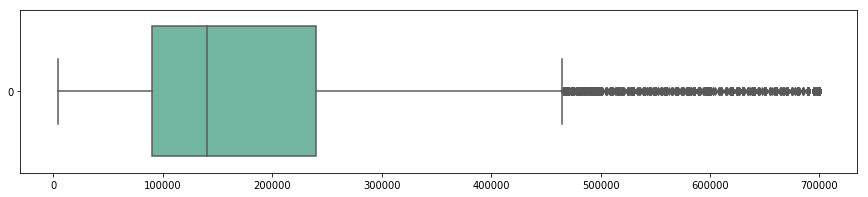

In [46]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_aprox_usd'], orient="h", palette="Set2")

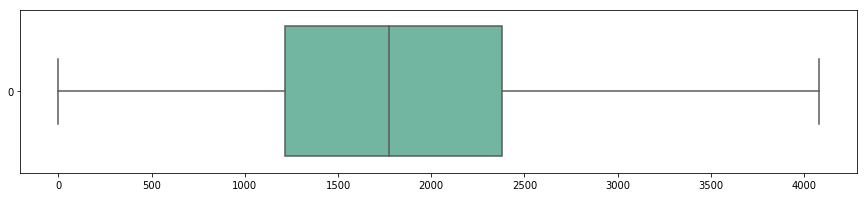

In [47]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_usd_per_m2'], orient="h", palette="Set2")

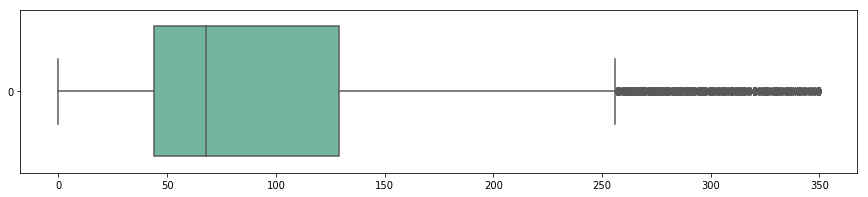

In [48]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['surface_covered_in_m2'], orient="h", palette="Set2")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 4: Análisis de correlación</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>


Para el análisis de correlación trabajamos con los tipos de propiedad por separado.  
Adicionalmente eliminamos las columnas de latitud y longitud, etc

In [49]:
df_corr = df[['property_type', 'place_with_parent_names', 'price_aprox_usd', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']]

Eliminamos aquellas filas que no tienen precio para que no distorcionen la correlacion.

In [50]:
mask = df_corr['price_aprox_usd'].isnull()
df_corr.drop(df_corr[mask].index, inplace=True)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56690 entries, 0 to 121219
Data columns (total 6 columns):
property_type              56690 non-null category
place_with_parent_names    56690 non-null object
price_aprox_usd            56690 non-null float64
surface_covered_in_m2      56690 non-null float64
price_usd_per_m2           56690 non-null float64
rooms                      21211 non-null float64
dtypes: category(1), float64(4), object(1)
memory usage: 2.6+ MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Eliminamos aquellas filas que no tienen `surface_covered_in_m2` para que no distorcionen la correlacion.

In [51]:
mask = df_corr['surface_covered_in_m2'].isnull()
df_corr.drop(df_corr[mask].index, inplace=True)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56690 entries, 0 to 121219
Data columns (total 6 columns):
property_type              56690 non-null category
place_with_parent_names    56690 non-null object
price_aprox_usd            56690 non-null float64
surface_covered_in_m2      56690 non-null float64
price_usd_per_m2           56690 non-null float64
rooms                      21211 non-null float64
dtypes: category(1), float64(4), object(1)
memory usage: 2.6+ MB


In [52]:
df_corr

,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms
0,PH,"Mataderos, Capital Federal, Argentina",62000.00,40.0,1127.272727,NaN
2,apartment,"Mataderos, Capital Federal, Argentina",72000.00,55.0,1309.090909,NaN
4,apartment,"Mar Del Plata, Buenos Aires, Argentina",64000.00,35.0,1828.571429,NaN
6,PH,"Vicente López, Buenos Aires, Argentina",130000.00,78.0,1226.415094,NaN
7,apartment,"Belgrano, Capital Federal, Argentina",138000.00,40.0,3066.666667,NaN
8,apartment,"Belgrano, Capital Federal, Argentina",195000.00,60.0,3000.000000,NaN
12,apartment,"San Isidro, Buenos Aires, Argentina",115000.00,36.0,2948.717949,NaN
13,apartment,"Palermo, Capital Federal, Argentina",111700.00,30.0,2234.000000,1.0
14,apartment,"Palermo, Capital Federal, Argentina",147900.00,31.0,3521.428571,1.0
16,PH,"Mataderos, Capital Federal, Argentina",239000.00,98.0,1707.142857,4.0


In [53]:
df_ph = df_corr[df_corr['property_type']=='PH'].copy()
df_apartment = df_corr[df_corr['property_type']=='apartment'].copy()
df_house = df_corr[df_corr['property_type']=='house'].copy()
df_store = df_corr[df_corr['property_type']=='store'].copy()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


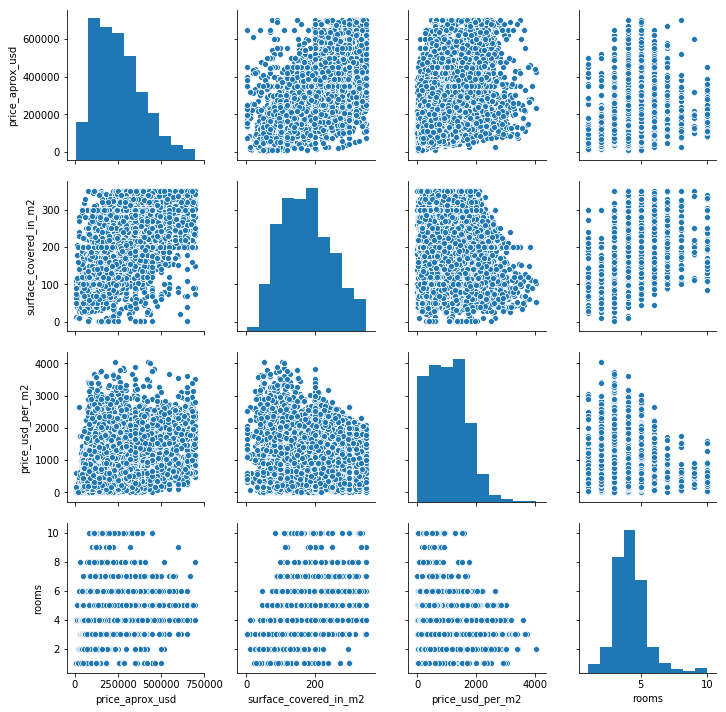

In [54]:
sns.pairplot(df_house)

In [55]:
df_corr.corr()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,rooms
price_aprox_usd,1.000000,0.737427,0.115334,0.542836
surface_covered_in_m2,0.737427,1.000000,-0.411446,0.734003
price_usd_per_m2,0.115334,-0.411446,1.000000,-0.313836
rooms,0.542836,0.734003,-0.313836,1.000000


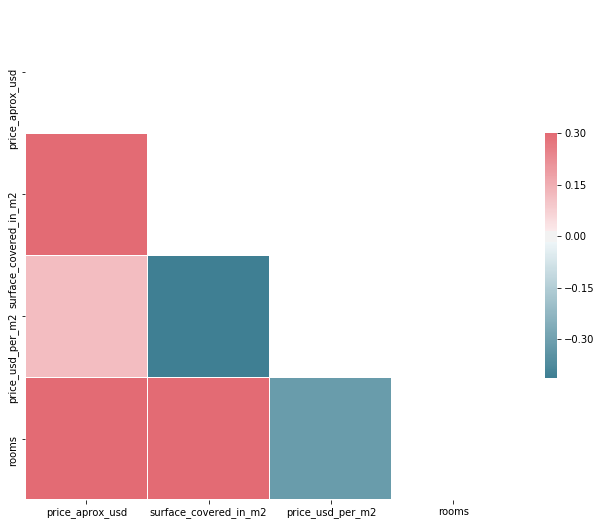

In [56]:
corr = df_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Una vez que identificamos la correlacion entre variables, podemos ver de que manera estan correlacionadas. Por ejemplo: `price` and `price_per_m2`, `price_aprox_local_currency` and `price_aprox_usd`.

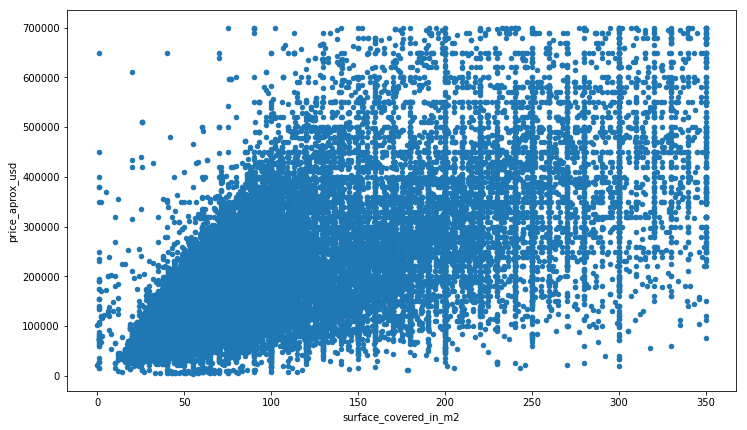

In [57]:
df.plot(x='surface_covered_in_m2', y='price_aprox_usd', kind='scatter', figsize=(12, 7))

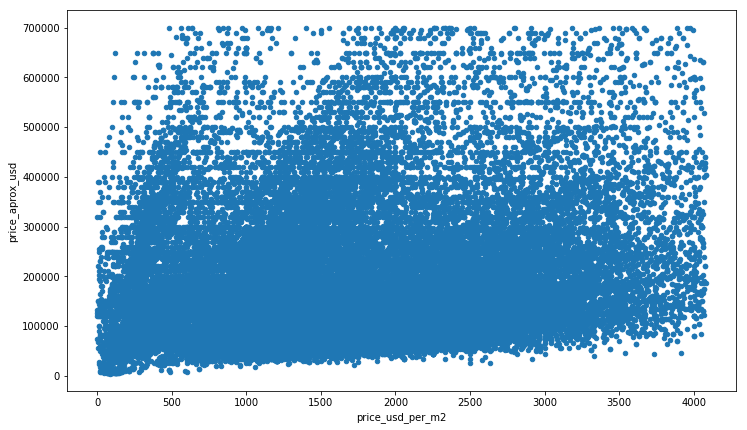

In [58]:
df.plot(x='price_usd_per_m2', y='price_aprox_usd', kind='scatter', figsize=(12, 7))

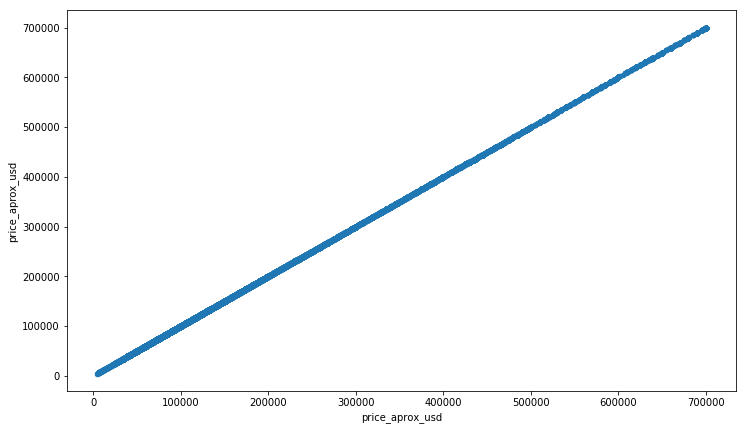

In [59]:
df.plot(x='price_aprox_usd', y='price_aprox_usd', kind='scatter', figsize=(12, 7))